In [16]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import load_model
from PIL import Image
import requests
from io import BytesIO
import cv2
import numpy as np
from google.colab import files
import io
from IPython.display import display

In [2]:
with tf.keras.utils.custom_object_scope({'KerasLayer': hub.KerasLayer}):
    modelo_cargado = load_model('/content/modelo_entrenado_sentimientos.h5')

Saving 640px-Tears_.jpg to 640px-Tears_.jpg


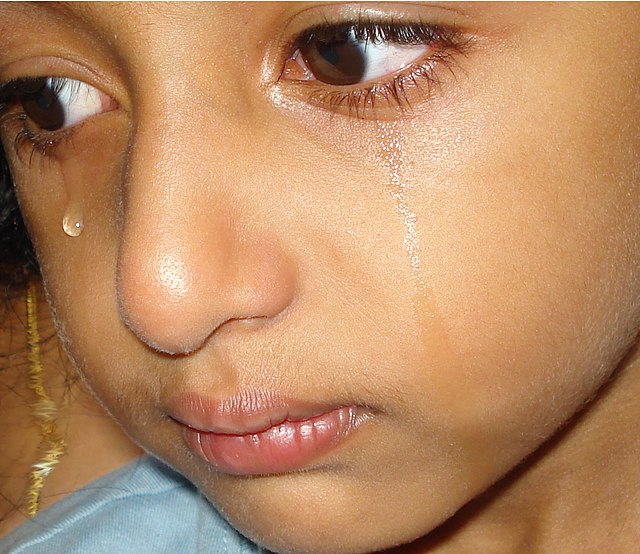

In [17]:
def select_and_load_image():
    # Abrir el navegador de archivos para subir una imagen
    uploaded = files.upload()

    # Asumimos que solo se sube una imagen
    for filename in uploaded.keys():
        # Cargar la imagen
        img = Image.open(io.BytesIO(uploaded[filename]))
        return img, filename

# Uso de la función
img, filename = select_and_load_image()

# Mostrar la imagen cargada
display(img)

In [18]:
etiquetas = {
    0: 'estresado',
    1: 'llorando',
    2: 'sonriendo',
    3: 'ninguna de las tres'
}
def categorizar(img):
    img = np.array(img).astype(float) / 255.0
    img = cv2.resize(img, (224, 224))

    # Asegurarse de que la imagen tenga 3 canales de color
    if img.shape[-1] != 3:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    # Preparar la imagen para la predicción
    img = img.reshape(-1, 224, 224, 3)

    # Realizar la predicción
    prediccion = modelo_cargado.predict(img)

    # Obtener los valores de la predicción
    prediccion_valores = prediccion[0]

    # Verificar si todos los valores son menores a 0.5
    if np.all(prediccion_valores < 0.5):
        resultado = 3
    else:
        # Si no, obtener la categoría con el valor más alto
        resultado = np.argmax(prediccion_valores, axis=-1)

    # Obtener la etiqueta correspondiente
    etiqueta = etiquetas[resultado]

    return etiqueta, prediccion

    return resultado, prediccion

In [19]:
etiqueta, prediccion = categorizar(img)
print(f'Resultado de la categorización: {etiqueta}')
print(f'Valores de la predicción: {prediccion}')

1/1 [==============================] - 0s 52ms/step
Resultado de la categorización: llorando
Valores de la predicción: [[6.4556742e-05 8.6500239e-01 1.3493308e-01]]
